### 6-4 Singular Value Decomposition

In [1]:
# numpy svd module import
import numpy as np
from numpy.linalg import svd

# 4x4 matrix a
np.random.seed(121)
a = np.random.randn(4,4)
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [5]:
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('U matrix:\n', np.round(U, 3))
print('Sigma Value:\n', np.round(Sigma, 3))
print('V transpose matrix:\n', np.round(Vt, 3))

(4, 4) (4,) (4, 4)
U matrix:
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
Sigma Value:
 [3.423 2.023 0.463 0.079]
V transpose matrix:
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


In [10]:
# Sigma -> symmetric matrix tronsform
Sigma_mat = np.diag(Sigma)
Sigma_mat

array([[3.4229581 , 0.        , 0.        , 0.        ],
       [0.        , 2.02287339, 0.        , 0.        ],
       [0.        , 0.        , 0.46263157, 0.        ],
       [0.        , 0.        , 0.        , 0.07935069]])

In [11]:
# Original matrix can be reproduced with U, sigma, and Vt
a_ = np.dot(np.dot(U, Sigma_mat), Vt)
print(np.round(a_, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


* If there's a dependency in the original matrix

In [12]:
a[2] = a[0] + a[1]
a[3] = a[0]
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [17]:
# number of non-zero sigma value: 2 -> Rank of matrix a: 2
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('Sigma Value:\n', np.round(Sigma, 3))

(4, 4) (4,) (4, 4)
Sigma Value:
 [2.663 0.807 0.    0.   ]


In [19]:
U_ = U[:,:2]
Sigma_ = np.diag(Sigma[:2])
Vt_ = Vt[:2]
print(U_.shape, Sigma_.shape, Vt_.shape)
# U_ Sigma_ Vt_ inner product
a_ = np.dot(np.dot(U_, Sigma_), Vt_)
print(np.round(a_, 3))

(4, 2) (2, 2) (2, 4)
[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


* Truncated SVD

In [32]:
import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svd

# original matrix and U, Sigma, Vt when SVD is applied
np.random.seed(121)
matrix = np.random.random((6, 6))
print('Origianl matrix:\n', matrix)
U, Sigma, Vt = svd(matrix, full_matrices=False)
print('\n decomposed matrix shape:', U.shape, Sigma.shape, Vt.shape)
print('\n Sigma value:', Sigma)

# Truncated SVD : number of sigma's singular value -> 4
num_components = 4
U_tr, Sigma_tr, Vt_tr = svds(matrix, k=num_components)
print('\nTruncated SVD decomposition matrix shape:', U_tr.shape, Sigma_tr.shape, Vt_tr.shape)
print('\nTruncated SVD Sigma value:', Sigma_tr)

matrix_tr = np.dot(np.dot(U_tr, np.diag(Sigma_tr)), Vt_tr)

print('\nReproduced matrix:\n', matrix_tr)

Origianl matrix:
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]

 decomposed matrix shape: (6, 6) (6,) (6, 6)

 Sigma value: [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]

Truncated SVD decomposition matrix shape: (6, 4) (4,) (4, 6)

Truncated SVD Sigma value: [0.55463089 0.83865238 0.88116505 3.2535007 ]

Reproduced matrix:
 [[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.8

### Scikit learn Truncated SVD class

Text(0, 0.5, 'TruncatedSVD Component 2')

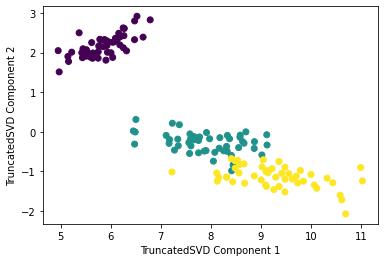

In [34]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()
iris_ftrs = iris.data
# Truncated SVD 2 components
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

# Scatter plot for data transformed by truncatedSVD
plt.scatter(x=iris_tsvd[:,0], y=iris_tsvd[:,1], c=iris.target)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')


Text(0.5, 1.0, 'PCA transformation')

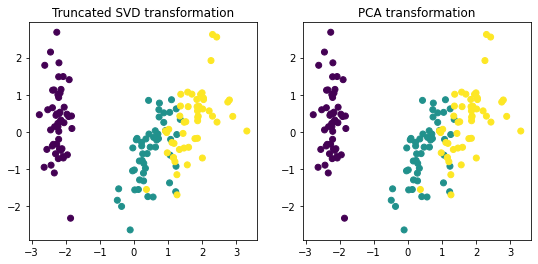

In [36]:
# comparison between trncatedSVD and PCA
from sklearn.preprocessing import StandardScaler

# StandardScale
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

# TruncatedSVD based on scaled data
tsvd = TruncatedSVD(n_components = 2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)
# PCA based on scaled data
pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

fig, (ax1, ax2) = plt.subplots(figsize=(9, 4), ncols=2)
ax1.scatter(x=iris_tsvd[:,0], y=iris_tsvd[:,1], c=iris.target)
ax2.scatter(x=iris_pca[:,0], y=iris_pca[:,1], c=iris.target)
ax1.set_title('Truncated SVD transformation')
ax2.set_title('PCA transformation')

In [40]:
# PCA is made of SVD algorithm
# if data is scaled, they are essentially same
print((iris_pca - iris_tsvd).mean())
print(pca.components_)
print(tsvd.components_)

2.3357935955795976e-15
[[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]]
[[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]]


### 6-4 NMF (Non-Negative Matrix Factorization)

Text(0, 0.5, 'NMF Component 2')

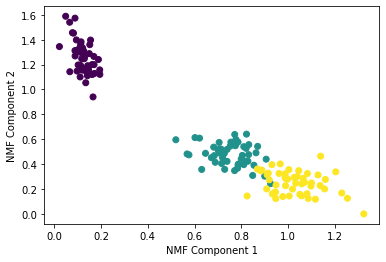

In [46]:
from sklearn.decomposition import NMF
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()
iris_ftrs = iris.data
nmf = NMF(n_components=2, init='nndsvd', max_iter=1000)
nmf.fit(iris_ftrs)
iris_nmf = nmf.transform(iris_ftrs)
plt.scatter(x=iris_nmf[:,0], y=iris_nmf[:,1], c=iris.target)
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')

In [43]:
NMF?

Init signature:
NMF(
    n_components=None,
    *,
    init='warn',
    solver='cd',
    beta_loss='frobenius',
    tol=0.0001,
    max_iter=200,
    random_state=None,
    alpha=0.0,
    l1_ratio=0.0,
    verbose=0,
    shuffle=False,
    regularization='both',
)
Docstring:     
Non-Negative Matrix Factorization (NMF).

Find two non-negative matrices (W, H) whose product approximates the non-
negative matrix X. This factorization can be used for example for
dimensionality reduction, source separation or topic extraction.

The objective function is:

    .. math::

        0.5 * ||X - WH||_{Fro}^2 + alpha * l1_{ratio} * ||vec(W)||_1

        + alpha * l1_{ratio} * ||vec(H)||_1

        + 0.5 * alpha * (1 - l1_{ratio}) * ||W||_{Fro}^2

        + 0.5 * alpha * (1 - l1_{ratio}) * ||H||_{Fro}^2

Where:

:math:`||A||_{Fro}^2 = \sum_{i,j} A_{ij}^2` (Frobenius norm)

:math:`||vec(A)||_1 = \sum_{i,j} abs(A_{ij})` (Elementwise L1 norm)

For multiplicative-update ('mu') solver, the Frobenius nor